In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
# Load dataset
df = pd.read_csv("ifood_df.csv")

# Display first 5 rows
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [3]:
# Shape and types
df.shape
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [4]:
# Drop or fill missing values 
df = df.dropna() 


Average Amount Spent: 51622.0947845805


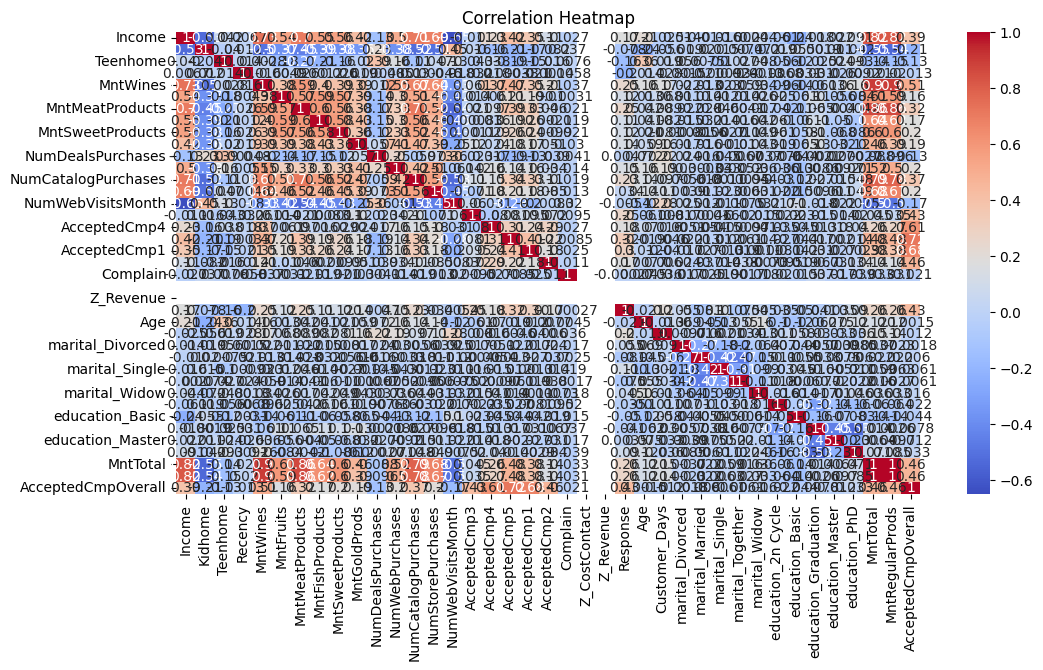

In [5]:
# Example: Average amount spent
print("Average Amount Spent:", df['Income'].mean())

# Frequency of purchases (example column: NumWebPurchases)
df['NumWebPurchases'].value_counts()

# Correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [6]:
# Choose relevant features for segmentation
features = df[['Income', 'Kidhome', 'Teenhome', 'Recency',
               'MntWines', 'MntFruits', 'MntMeatProducts',
               'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
               'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
               'NumStorePurchases', 'NumWebVisitsMonth']]

# Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


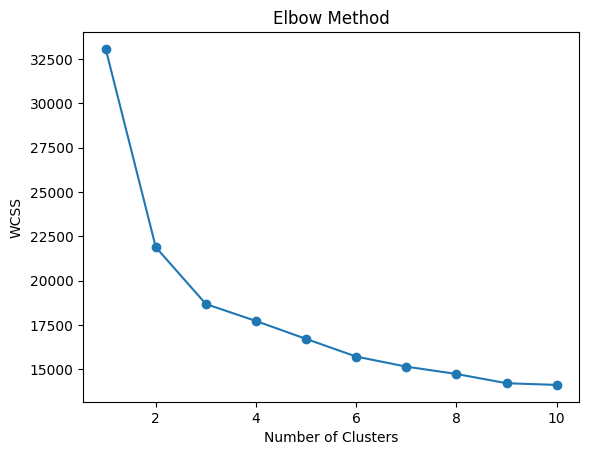

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [9]:
# Assuming elbow suggested 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


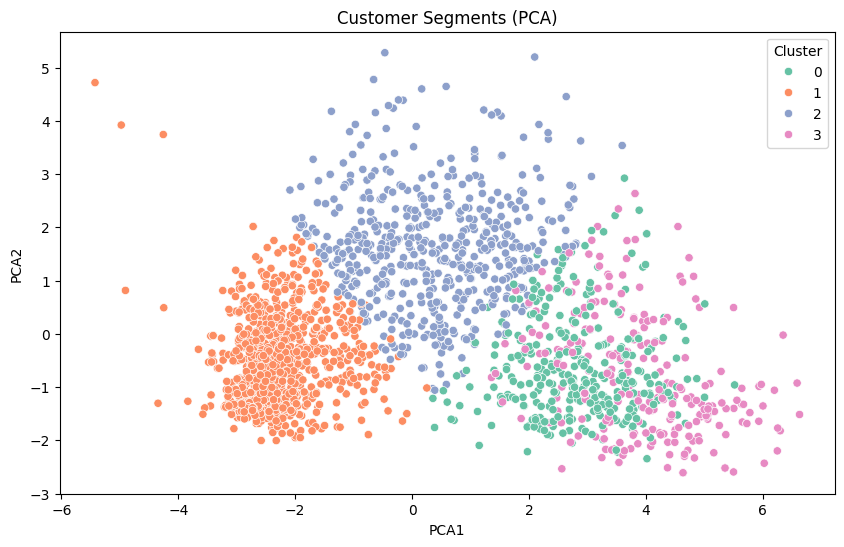

In [10]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Customer Segments (PCA)")
plt.show()


In [11]:
# Group by cluster to understand characteristics
cluster_summary = df.groupby('Cluster')[features.columns].mean()
cluster_summary.T


Cluster,0,1,2,3
Income,75313.608939,33741.033233,57193.028814,74301.946970
Kidhome,0.047486,0.800604,0.259322,0.037879
Teenhome,0.145251,0.432024,0.954237,0.276515
Recency,50.740223,48.950655,48.527119,47.958333
MntWines,671.226257,38.673716,439.359322,519.579545
MntFruits,40.293296,4.838872,19.798305,103.439394
MntMeatProducts,439.932961,22.075529,124.416949,423.068182
MntFishProducts,74.497207,7.100705,26.247458,128.962121
MntSweetProducts,42.701117,4.895267,20.611864,104.200758
MntGoldProds,62.279330,14.887210,58.798305,96.121212


In [12]:
# Add label explanations manually after analyzing the cluster_summary
cluster_labels = {
    0: 'High-Value Loyal',
    1: 'Budget Online Shoppers',
    2: 'Family Mid-Spenders',
    3: 'Low Engagement Customers'
}

# Create a new column with these labels
df['Segment_Label'] = df['Cluster'].map(cluster_labels)

# Check a few rows
df[['Cluster', 'Segment_Label']].head()


,Cluster,Segment_Label
0,3,Low Engagement Customers
1,1,Budget Online Shoppers
2,0,High-Value Loyal
3,1,Budget Online Shoppers
4,2,Family Mid-Spenders


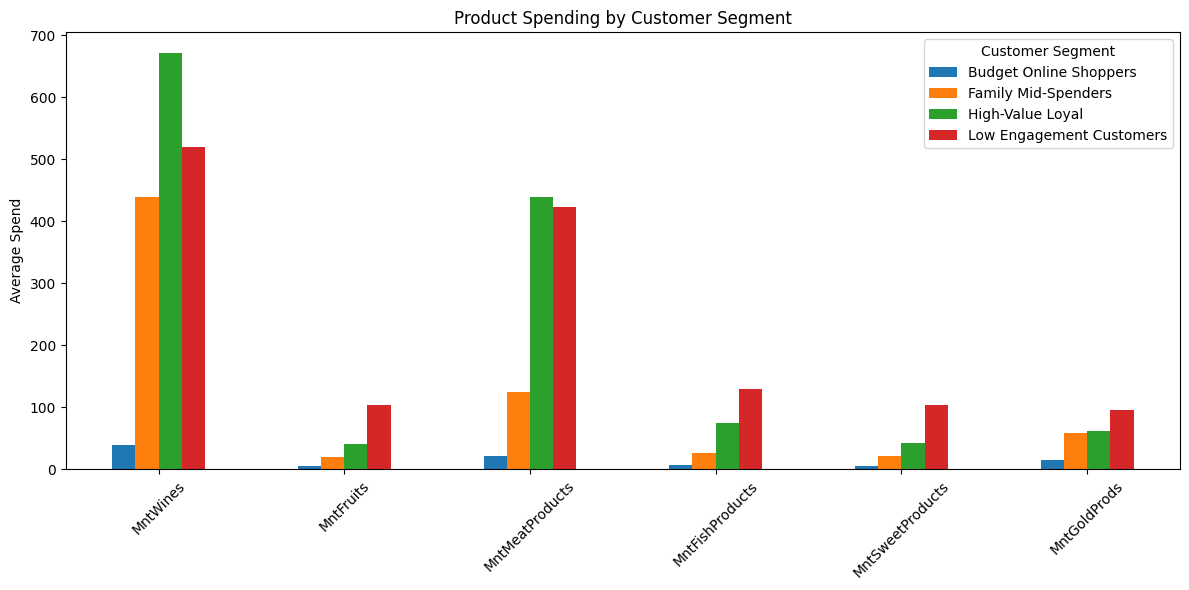

In [13]:
cluster_summary = df.groupby('Segment_Label')[features.columns].mean()

# Plot spending per segment
spending_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cluster_summary[spending_features].T.plot(kind='bar', figsize=(12, 6))
plt.title('Product Spending by Customer Segment')
plt.ylabel('Average Spend')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()
